### 목표
- 붓꽃 꽃잎의 길이/너비, 꽃받침의 길이/너비 특징 4개를 활용하여 품종 3가지를 분류하는 모델을 만들어보자
- 3개 이상의 클래스로 분류 : 다중 분류
- knn 모델의 이웃의 숫자를 조정해보자(k==ne_neighbors, 하이퍼 파라미터 튜닝)

In [10]:
# 환경 셋팅
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris

from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import cross_val_predict, train_test_split


### 데이터 불러오기
- 크기 확인
- 형태 확인
- 내부 정보 확인

In [11]:
iris_data = load_iris()
iris_data

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

### 데이터 셋 구성
- 보기 편한 형식으로 데이터 정리
- 문제와 답 분리
- train과 test로 분리

In [12]:
iris_df = pd.DataFrame(iris_data['data'], columns=iris_data['feature_names'])
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [13]:
X = iris_df
y = iris_data.target

print("문제: ",X.shape, "/ 답 : " ,y.shape)
# X 데이터 - 숫자 형식 데이터 들어있어서 전처리가 필요하지 않음

문제:  (150, 4) / 답 :  (150,)


In [15]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=1)

print("훈련용 데이터", X_train.shape, y_train.shape)
print("테스트용 데이터", X_test.shape, y_test.shape)


훈련용 데이터 (120, 4) (120,)
테스트용 데이터 (30, 4) (30,)


In [20]:
np.bincount(y_train)

array([39, 37, 44], dtype=int64)

### model 불러오기


In [45]:
tree_model = DecisionTreeClassifier()


In [46]:
tree_model.fit(X_train,y_train)

DecisionTreeClassifier()

In [47]:
tree_model.score(X_test,y_test)

0.9666666666666667

In [48]:
# 교차 검증

from sklearn.model_selection import cross_val_score
result = cross_val_score(tree_model, X_train,y_train, cv=5)
print(result)
print(result.mean())

[0.95833333 0.95833333 0.95833333 0.95833333 0.875     ]
0.9416666666666668


In [49]:
fi = tree_model.feature_importances_
fi

array([0.        , 0.01880092, 0.58454592, 0.39665316])

In [53]:
import_df = pd.DataFrame(fi, index=X_train.columns)
import_df.sort_values(by=0, ascending = False)

,0
petal length (cm),0.584546
petal width (cm),0.396653
sepal width (cm),0.018801
sepal length (cm),0.000000


In [55]:
iris_data['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

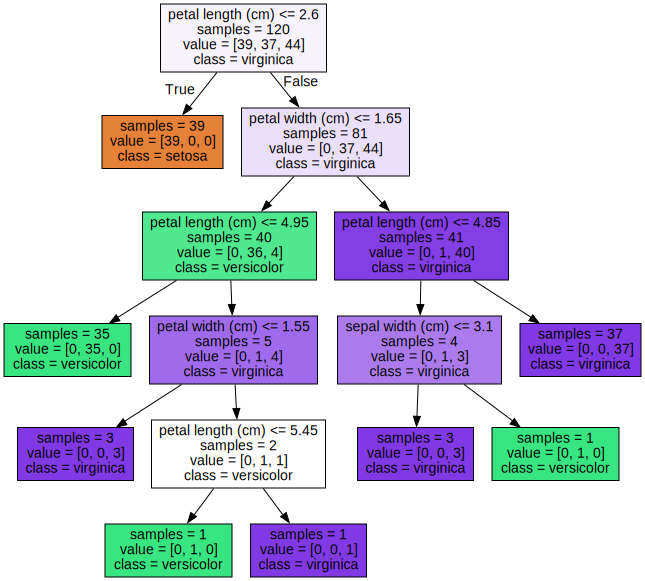

In [56]:
from sklearn.tree import export_graphviz
import graphviz
export_graphviz(tree_model, out_file='iris_tree.dot',
               class_names=['setosa','versicolor','virginica'],
               feature_names=X_train.columns,
               impurity=False,
               filled=True)

with open('./iris_tree.dot', encoding='UTF8') as f:
    dot_graph = f.read()

display(graphviz.Source(dot_graph))